In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

In [2]:
data=pd.read_excel('/kaggle/input/data-karyawan/Data Kesehatan Karyawan-Data 1  Data 2.xlsx', sheet_name='Data 2')

In [3]:
data

,Responden,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Cholesterol Total (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,Tempat lahir
0,1,M,19,126,88,172.5,49.50,16.53,66.0,84,187,99,26.4,6.0,0.971199,Purworejo
1,2,M,19,120,80,158.0,53.60,21.50,71.0,84,187,99,26.4,6.0,0.600000,Bogor
2,3,M,19,120,80,170.0,59.50,20.59,80.0,80,187,99,26.4,6.0,1.373939,bandung
3,4,F,19,100,70,149.0,45.10,20.31,62.0,81,187,99,30.5,3.5,1.000000,Jakarta
4,5,M,19,110,70,171.6,62.40,21.19,78.0,84,187,99,26.4,6.0,4.000000,Teluk Betung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1335,M,39,110,70,162.5,67.60,25.60,87.0,84,169,72,23.8,11.0,6.000000,Bogor
1335,1336,F,39,120,70,150.0,60.50,26.90,77.0,84,199,105,38.1,9.0,6.154761,Bogor
1336,1337,F,39,120,80,151.0,59.75,26.20,78.0,84,177,78,35.3,8.0,26.000000,Bogor
1337,1338,M,39,110,70,166.2,57.00,20.63,69.0,84,244,98,17.1,5.0,4.297226,Bogor


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Responden                  1339 non-null   int64  
 1   Jenis Kelamin              1339 non-null   object 
 2   Usia                       1339 non-null   int64  
 3   Tekanan darah  (S)         1339 non-null   int64  
 4   Tekanan darah  (D)         1339 non-null   int64  
 5   Tinggi badan (cm)          1339 non-null   float64
 6   Berat badan (kg)           1339 non-null   float64
 7   IMT (kg/m2)                1339 non-null   float64
 8   Lingkar perut (cm)         1339 non-null   float64
 9   Glukosa Puasa (mg/dL)      1339 non-null   int64  
 10  Cholesterol Total (mg/dL)  1339 non-null   int64  
 11  Trigliserida (mg/dL)       1339 non-null   int64  
 12  Fat                        1339 non-null   float64
 13  Visceral Fat               1339 non-null   float

In [5]:
data = data.drop(columns=['Responden'])

for column in data.columns:
    unique_values = data[column].unique()
    print(f"\nNilai unik dari kolom '{column}':")
    print(unique_values)


Nilai unik dari kolom 'Jenis Kelamin':
['M' 'F']

Nilai unik dari kolom 'Usia':
[19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]

Nilai unik dari kolom 'Tekanan darah  (S)':
[126 120 100 110 114 118 124  90 106 128 104 112 108 102 130 116  96 122
 140 107  98  92 132 170  95 125  94 105 129 115  80 138 119 131 150]

Nilai unik dari kolom 'Tekanan darah  (D)':
[ 88  80  70  74  78  60  62  84  66  72  64  68  76  86  73  77  90  61
  75  82  69  65  79  96  71  81  87 100  98  83  85  58  63  89]

Nilai unik dari kolom 'Tinggi badan (cm)':
[172.5 158.  170.  149.  171.6 174.5 164.5 166.3 172.8 179.  169.1 165.5
 160.  162.  158.5 175.2 178.4 175.5 154.  160.3 151.  167.9 170.4 169.
 165.  165.2 165.1 164.9 181.  157.5 162.5 166.  162.6 153.  175.  166.1
 165.8 150.3 163.7 151.5 172.  163.  167.  169.2 155.5 167.5 150.  173.
 170.9 169.5 163.5 171.  168.5 164.2 170.5 176.  173.8 166.5 177.  177.4
 149.7 161.  162.8 160.6 153.6 176.5 157.  180.5 177.7 160.5 156.1 163.3
 1

In [6]:
provinsi = {
    'Aceh': ['Banda Aceh'],
    'Sumatera Utara': ['Ujung Padang','Nias','Soposurung','Paya Pasir','Kabanjahe','Tanah Itam Ulu','Medan', 'Pematangsiantar', 'Pangkalan Brandan', 'Sibolga', 'Lhokseumawe'],
    'Sumatera Barat': ['Cupak','Seirampah','Bonjol','Sungai Penuh','Bukit Tinggi','Padang Panjang', 'Bukittinggi', 'Padang'],
    'Sumatera Selatan': ['Tanjung Agung','Palembang'],
    'Jambi':['Jambi'],
    'Riau': ['Ujung Batu','Pekan Baru','Pekanbaru', 'Rengas Pulau'],
    'KepRi':['Tanjungpinang','Tanjung Pinang','Batam'],
    'Lampung': ['Tanjung Karang','Tanjung Gading','Tri Rahayu','Kota Agung','Metro','Kalidadi','Negara Jaya','Liwa','Bumi Dipasena','Teluk Betung', 'B. Lampung', 'Lampung', 'Bandar Lampung', 'Lampung Selatan'],
    'Bengkulu': ['Penago II','Bengkulu'],
    'Bangka':[ 'Tanjung Pandan','Mentok'],
    'Banten': ['Banten','Pandeglang','Serang', 'Tangerang', 'Tanggerang'],
    'Jawa Barat': ['Kuningan','Majalengka','Bekasi','Ciamis','Indramayu','Bogor', 'Bandung', 'Cirebon', 'Sumedang', 'Sukabumi', 'Cianjur', 'Garut', 'Depok', 'Cimahi', 'Tasikmalaya', 'Purwakarta', 'Subang', 'Karawang', 'Cibadak'],
    'Jawa Tengah': ['Karanganyar','Kab. Semarang','Sukoharjo','Jepara','Banjarnegara','Kendal','Solo','Grobogan','Ngawi','Bumi Ayu','Banyumas','Purbalingga','Surakarta','Brebes','Boyolali','Purworejo', 'Semarang', 'Magelang', 'Tegal', 'Salatiga', 'Klaten', 'Kebumen', 'Temanggung', 'Pati', 'Wonogiri', 'Wonosobo', 'Pemalang', 'Pekalongan', 'Sragen', 'Cilacap', 'Kudus'],
    'Jawa Timur': ['Gresik','Pamekasan','Pasuruan','Lamongan','Lumajang','lamongan','Surabaya', 'Malang', 'Sidoarjo', 'Jember', 'Kediri', 'Tulung Agung', 'Madiun', 'Blora', 'Bojonegoro', 'Bondowoso', 'Nganjuk', 'Trenggalek', 'Ponorogo', 'Magetan'],
    'DKI Jakarta': ['Jakarta Utara','Jakarta', 'Kota Administrasi Jakarta Pusat', 'Kota Administrasi Jakarta Barat', 'Kota Administrasi Jakarta Selatan', 'Kota Administrasi Jakarta Utara'],
    'DI Yogyakarta': ['Gunung Kidul','Srimulyo','Bantul', 'Sleman', 'Gunungkidul', 'Kulon Progo', 'Yogyakarta'],
    'Bali': ['Denpasar'],
    'Nusa Tenggara Barat': ['Mataram'],
    'Nusa Tenggara Timur': ['Quelicai'],
    'Kalimantan Timur': ['Samarinda', 'Balikpapan', 'Balipapan'],
    'Kalimantan Selatan': ['Banjarmasin', 'Barabai'],
    'Kalimantan Barat': ['Singkawang','Pontianak', 'Pemangkat'],
    'Sulawesi Selatan': ['Balang Toa','Ujung Pandang', 'Maros','Tana Toraja','Makassar', 'Ujung Baru', 'Sungguminasa', 'Watampone', 'Sosok'],
    'Sulawesi Utara': ['Manado'],
    'Sulawesi Tenggara':['Raha'],
    'Sulawesi Tengah':['Toli - Toli'],
    'Maluku': ['Ambon'],
    'Papua': ['Jayapura', 'Sentani'],
    'Papua Barat':['Manokwari'],
    'Timor Leste':['Dili'],
}
def cari_provinsi(daerah):
    for prov, daerah_daerah in provinsi.items():
        if daerah.lower() in [x.lower() for x in daerah_daerah]:
            return prov
    return 'Provinsi tidak ditemukan'

daftar_daerah = data['Tempat lahir']
hasil = {}
for daerah in daftar_daerah:
    prov = cari_provinsi(daerah)
    hasil.setdefault(prov, []).append(daerah)

# for prov, daerah_daerah in hasil.items():
#     print(f"{prov}: {daerah_daerah}")


In [7]:
data['Provinsi'] = data['Tempat lahir'].apply(cari_provinsi)

In [8]:
kolom_provinsi_tidak_ditemukan = data[data['Provinsi'] == 'Provinsi tidak ditemukan']

tempat_lahir_provinsi_tidak_ditemukan = kolom_provinsi_tidak_ditemukan['Tempat lahir'].unique()

print("Tempat lahir yang memiliki nilai 'Provinsi tidak ditemukan':")
print(tempat_lahir_provinsi_tidak_ditemukan)

Tempat lahir yang memiliki nilai 'Provinsi tidak ditemukan':
[]


In [9]:
data = data.drop(columns=['Tempat lahir'])

In [10]:
for column in data.select_dtypes(include='object').columns:
    counts = data[column].value_counts()
    print(f"\nJumlah baris per nilai unik dari kolom '{column}':")
    print(counts)


Jumlah baris per nilai unik dari kolom 'Jenis Kelamin':
Jenis Kelamin
M    1013
F     326
Name: count, dtype: int64

Jumlah baris per nilai unik dari kolom 'Provinsi':
Provinsi
Jawa Barat             662
DKI Jakarta            283
Jawa Tengah            164
Jawa Timur              63
Sumatera Utara          32
DI Yogyakarta           22
Lampung                 20
Sumatera Barat          11
Banten                  11
Sulawesi Selatan        10
Sumatera Selatan         9
Kalimantan Barat         8
Riau                     7
Kalimantan Timur         7
KepRi                    4
Kalimantan Selatan       3
Nusa Tenggara Barat      3
Bangka                   3
Bengkulu                 3
Sulawesi Utara           2
Papua                    2
Bali                     2
Jambi                    1
Aceh                     1
Nusa Tenggara Timur      1
Maluku                   1
Timor Leste              1
Sulawesi Tenggara        1
Sulawesi Tengah          1
Papua Barat              1
Name: count,

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Jenis Kelamin              1339 non-null   object 
 1   Usia                       1339 non-null   int64  
 2   Tekanan darah  (S)         1339 non-null   int64  
 3   Tekanan darah  (D)         1339 non-null   int64  
 4   Tinggi badan (cm)          1339 non-null   float64
 5   Berat badan (kg)           1339 non-null   float64
 6   IMT (kg/m2)                1339 non-null   float64
 7   Lingkar perut (cm)         1339 non-null   float64
 8   Glukosa Puasa (mg/dL)      1339 non-null   int64  
 9   Cholesterol Total (mg/dL)  1339 non-null   int64  
 10  Trigliserida (mg/dL)       1339 non-null   int64  
 11  Fat                        1339 non-null   float64
 12  Visceral Fat               1339 non-null   float64
 13  Masa Kerja                 1339 non-null   float

In [12]:
data['Cholesterol Total (mg/dL)'] = data['Cholesterol Total (mg/dL)'].apply(lambda x: 1 if x >= 200 else 0)

In [13]:
numerical_columns = list(data.loc[:,['Usia', 'Tekanan darah  (S)', 'Tekanan darah  (D)', 'Tinggi badan (cm)', 'Berat badan (kg)','IMT (kg/m2)','Lingkar perut (cm)','Glukosa Puasa (mg/dL)','Trigliserida (mg/dL)','Fat','Visceral Fat','Masa Kerja']])
categorical_columns = list(data.loc[:,['Cholesterol Total (mg/dL)','Jenis Kelamin', 'Provinsi']])

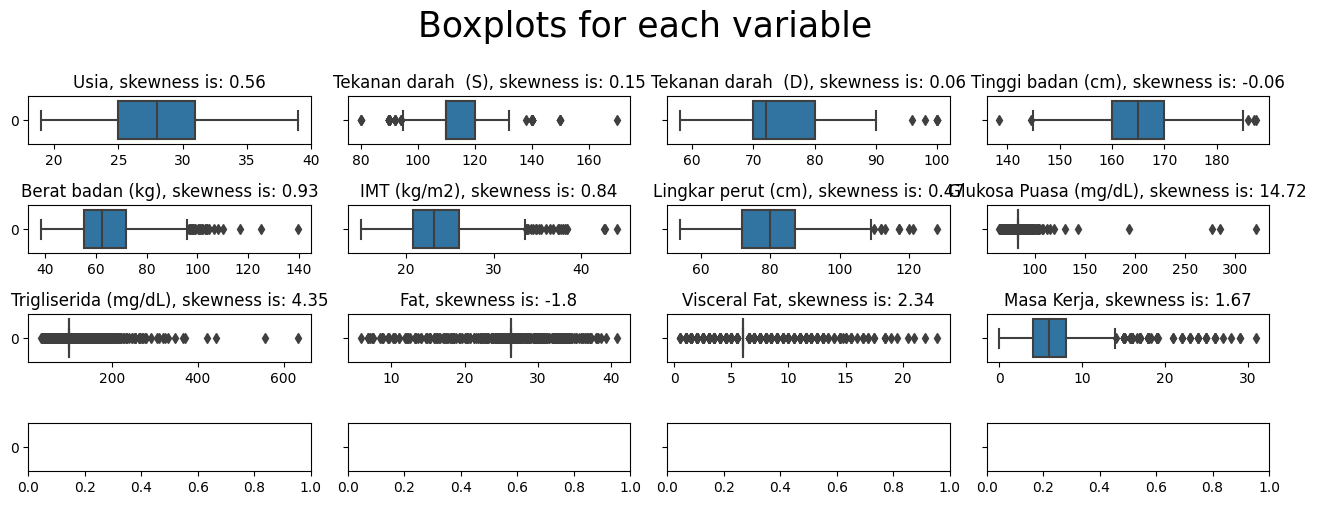

In [14]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=data, columns_list=numerical_columns, rows=4, cols=4, suptitle='Boxplots for each variable')
plt.tight_layout()

In [15]:
def IQR_method (df,n,features):
    outlier_list = []
    
    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        outlier_list.extend(outlier_list_column)
        
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    ively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [16]:
Outliers_IQR = IQR_method(data,1,numerical_columns)

df = data.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 91


In [17]:
df = pd.get_dummies(df, drop_first=True)

In [18]:
X = df.drop('Cholesterol Total (mg/dL)', axis=1)
y = df['Cholesterol Total (mg/dL)']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Usia                          800 non-null    int64  
 1   Tekanan darah  (S)            800 non-null    int64  
 2   Tekanan darah  (D)            800 non-null    int64  
 3   Tinggi badan (cm)             800 non-null    float64
 4   Berat badan (kg)              800 non-null    float64
 5   IMT (kg/m2)                   800 non-null    float64
 6   Lingkar perut (cm)            800 non-null    float64
 7   Glukosa Puasa (mg/dL)         800 non-null    int64  
 8   Cholesterol Total (mg/dL)     800 non-null    int64  
 9   Trigliserida (mg/dL)          800 non-null    int64  
 10  Fat                           800 non-null    float64
 11  Visceral Fat                  800 non-null    float64
 12  Masa Kerja                    800 non-null    float64
 13  Jenis

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
from sklearn.preprocessing import StandardScaler

def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [22]:
numerical_columns

['Usia',
 'Tekanan darah  (S)',
 'Tekanan darah  (D)',
 'Tinggi badan (cm)',
 'Berat badan (kg)',
 'IMT (kg/m2)',
 'Lingkar perut (cm)',
 'Glukosa Puasa (mg/dL)',
 'Trigliserida (mg/dL)',
 'Fat',
 'Visceral Fat',
 'Masa Kerja']

In [30]:
col_names = numerical_columns
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [32]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [33]:
estimator = []
estimator.append(('Neural Network', MLPClassifier(max_iter = 10000) ))
estimator.append(('LogisticRegression', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 200)))
estimator.append(('ExtraTreesClassifier', ExtraTreesClassifier() ))
estimator.append(('RandomForest', RandomForestClassifier() ))
#estimator.append(('KNN', KNeighborsClassifier() ))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('AdaBoostClassifier', AdaBoostClassifier() ))
estimator.append(('GradientBoostingClassifier', GradientBoostingClassifier() ))
estimator.append(('XGB', XGBClassifier() ))
estimator.append(('CatBoost', CatBoostClassifier(logging_level='Silent') ))

In [34]:
VC_hard = VotingClassifier(estimators = estimator, voting ='hard')
VC_hard.fit(X_train, y_train)
y_pred = VC_hard.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       222
           1       0.50      0.28      0.36        18

    accuracy                           0.93       240
   macro avg       0.72      0.63      0.66       240
weighted avg       0.91      0.93      0.91       240



In [36]:
cm = confusion_matrix(y_test, y_pred)

VC_hard_Recall = recall_score(y_test, y_pred)
VC_hard_Precision = precision_score(y_test, y_pred)
VC_hard_f1 = f1_score(y_test, y_pred)
VC_hard_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[217   5]
 [ 13   5]]


In [41]:
from statistics import stdev
score = cross_val_score(VC_hard, X_train, y_train, cv=5, scoring='recall')
VC_hard_cv_score = score.mean()
VC_hard_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', VC_hard_cv_score)
print('Cross Validation Recall standard deviation: ', VC_hard_cv_stdev)

Cross Validation Recall scores are: [0.2        0.1        0.11111111 0.         0.11111111]
Average Cross Validation Recall score:  0.10444444444444445
Cross Validation Recall standard deviation:  0.07097208632298362


In [42]:
ndf = [(VC_hard_Recall, VC_hard_Precision, VC_hard_f1, VC_hard_accuracy, VC_hard_cv_score, VC_hard_cv_stdev)]

VC_hard_score = pd.DataFrame(data = ndf, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
VC_hard_score.insert(0, 'Voting Classifier', 'Hard Voting')
VC_hard_score

,Voting Classifier,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,Hard Voting,0.277778,0.5,0.357143,0.925,0.104444,0.070972


In [43]:
VC_soft = VotingClassifier(estimators = estimator, voting ='soft')
VC_soft.fit(X_train, y_train)
y_pred = VC_soft.predict(X_test)

In [44]:
VC_soft = VotingClassifier(estimators = estimator, voting ='soft')
VC_soft.fit(X_train, y_train)
y_pred = VC_soft.predict(X_test)

In [45]:
cm = confusion_matrix(y_test, y_pred)

VC_soft_Recall = recall_score(y_test, y_pred)
VC_soft_Precision = precision_score(y_test, y_pred)
VC_soft_f1 = f1_score(y_test, y_pred)
VC_soft_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[218   4]
 [ 14   4]]


In [46]:
score2 = cross_val_score(VC_soft, X_train, y_train, cv=5, scoring='recall')

In [47]:
VC_soft_cv_score = score2.mean()
VC_soft_cv_stdev = stdev(score2)

print('Cross Validation Recall scores are: {}'.format(score2))
print('Average Cross Validation Recall score: ', VC_soft_cv_score)
print('Cross Validation Recall standard deviation: ', VC_soft_cv_stdev)

Cross Validation Recall scores are: [0.3        0.2        0.11111111 0.         0.22222222]
Average Cross Validation Recall score:  0.16666666666666669
Cross Validation Recall standard deviation:  0.11493422703098444


In [48]:
ndf2 = [(VC_soft_Recall, VC_soft_Precision, VC_soft_f1, VC_soft_accuracy, VC_soft_cv_score, VC_soft_cv_stdev)]

VC_soft_score = pd.DataFrame(data = ndf2, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
VC_soft_score.insert(0, 'Voting Classifier', 'Soft Voting')
VC_soft_score

,Voting Classifier,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,Soft Voting,0.222222,0.5,0.307692,0.925,0.166667,0.114934


In [49]:
predictions = pd.concat([VC_hard_score, VC_soft_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Avg CV Recall'], ascending=False)

,Voting Classifier,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
1,Soft Voting,0.222222,0.5,0.307692,0.925,0.166667,0.114934
0,Hard Voting,0.277778,0.5,0.357143,0.925,0.104444,0.070972
